# Import Modules and Data

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # O
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv(r'Telecom Churn.csv')

# EDA

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.shape

(3333, 21)

In [76]:
# Map 'no' to 0 and 'yes' to 1 for 'international plan' and 'voice mail plan'
df['international plan'] = df['international plan'].map({'no': 0, 'yes': 1})
df['voice mail plan'] = df['voice mail plan'].map({'no': 0, 'yes': 1})

# One-hot encode 'churn' column into 0 and 1
df['churn'] = df['churn'].astype(int)

In [77]:
df.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [10]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   int64  
 5   voice mail plan         3333 non-null   int64  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [79]:
mean_daily_mins = df['total day minutes'].values.mean()
max_daily_mins = df['total day minutes'].values.max()
print('The mean is: ', "{:.2f}".format(mean_daily_mins))
print('The max is: ', "{:.2f}".format(max_daily_mins))

The mean is:  179.78
The max is:  350.80


# Data Visualization

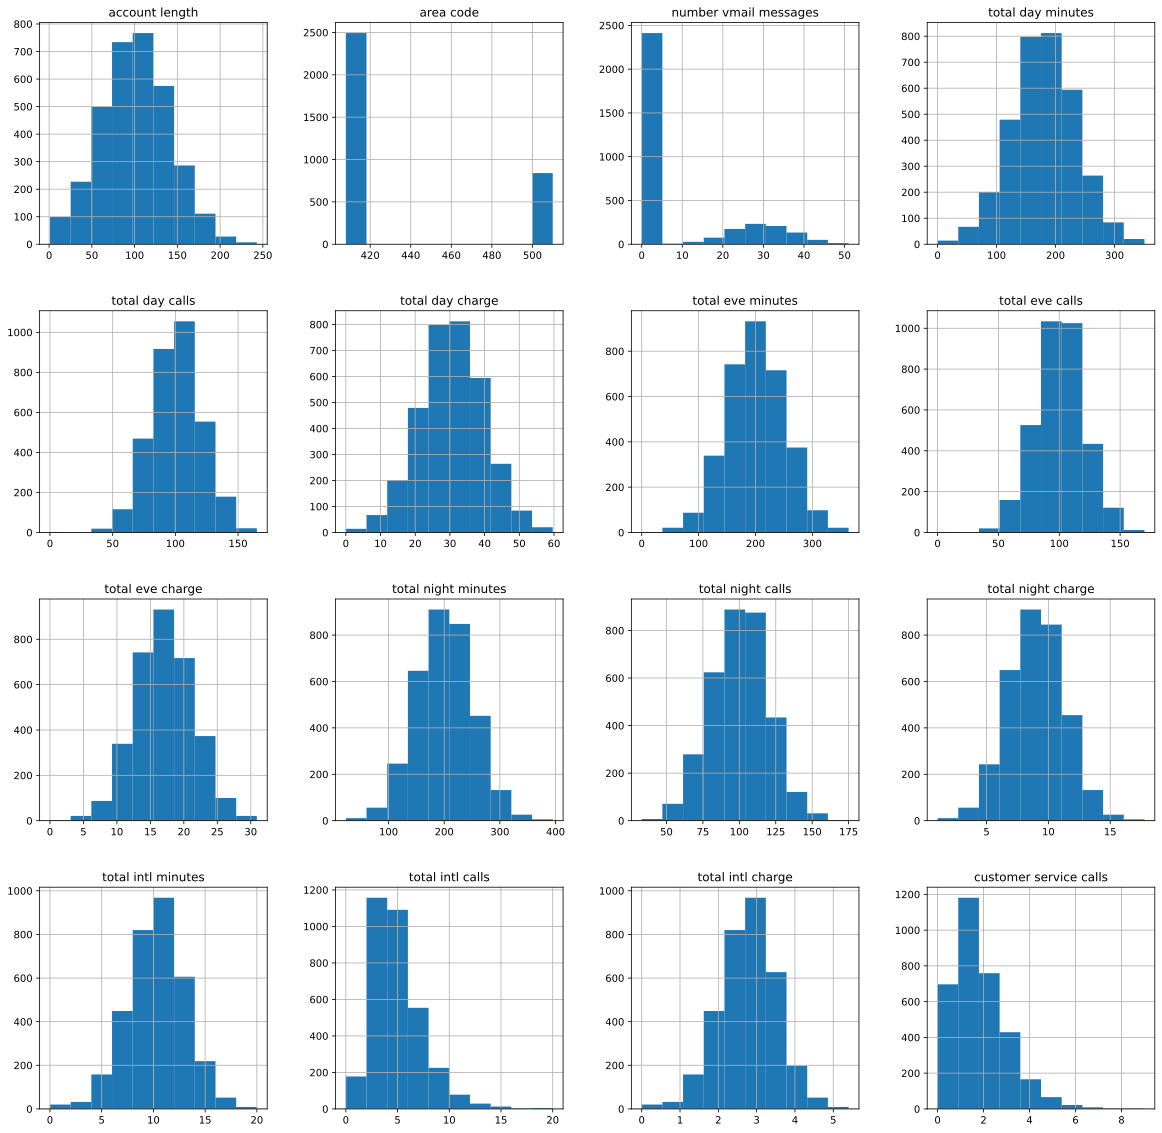

In [22]:
df.hist(figsize=(20,20))
plt.show()

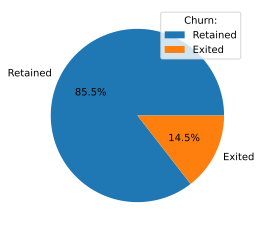

In [26]:
y = values=df['churn'].value_counts()
mylabels = ["Retained", "Exited"]
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.legend(title = "Churn:")
plt.show() 


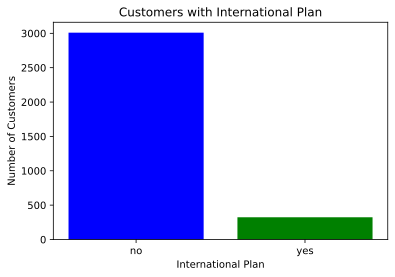

In [32]:
# Group the data by 'International_Plan' and count the occurrences
plan_counts = df['international plan'].value_counts()

# Create a bar chart
plt.bar(plan_counts.index, plan_counts.values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('International Plan')
plt.ylabel('Number of Customers')
plt.title('Customers with International Plan')

# Show the plot
plt.show()

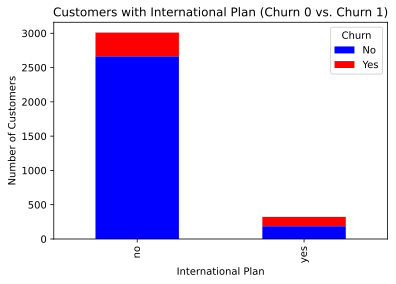

In [33]:
# Group the data by 'International_Plan' and 'Churn' and count the occurrences
grouped = df.groupby(['international plan', 'churn']).size().unstack(fill_value=0)

# Create a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, color=['blue', 'red'])

# Add labels and title
plt.xlabel('International Plan')
plt.ylabel('Number of Customers')
plt.title('Customers with International Plan (Churn 0 vs. Churn 1)')

# Customize legend
ax.legend(title='Churn', labels=['No', 'Yes'])

# Show the plot
plt.show()

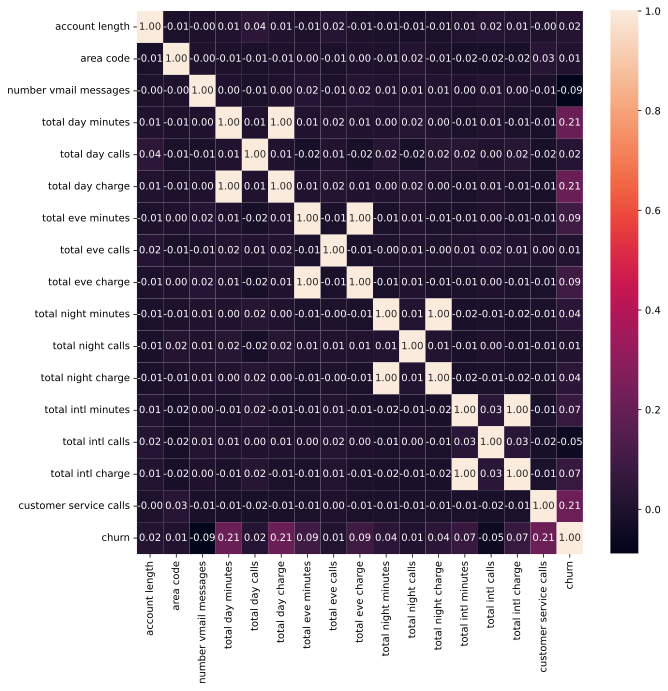

In [43]:
corr_matrix = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix , annot=True, fmt='0.2f')
plt.show()

Text(0.5, 1.0, 'Distribution of day charges by churn')

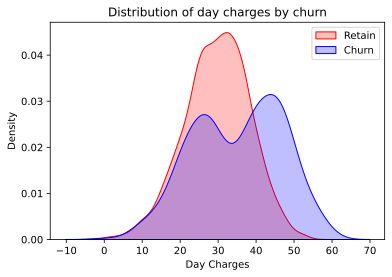

In [49]:
# Churn by day charges
ax = sns.kdeplot(df['total day charge'][(df["churn"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(df['total day charge'][(df["churn"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of day charges by churn')

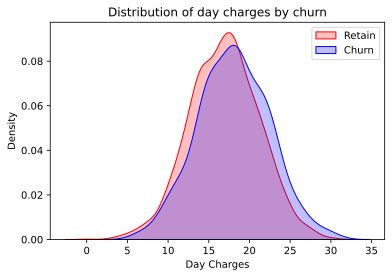

In [51]:
# Churn by evening charges
ax = sns.kdeplot(df['total eve charge'][(df["churn"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(df['total eve charge'][(df["churn"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

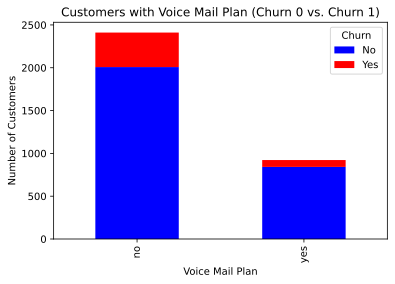

In [52]:
# Group the data by 'International_Plan' and 'Churn' and count the occurrences
grouped = df.groupby(['voice mail plan', 'churn']).size().unstack(fill_value=0)

# Create a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, color=['blue', 'red'])

# Add labels and title
plt.xlabel('Voice Mail Plan')
plt.ylabel('Number of Customers')
plt.title('Customers with Voice Mail Plan (Churn 0 vs. Churn 1)')

# Customize legend
ax.legend(title='Churn', labels=['No', 'Yes'])

# Show the plot
plt.show()

#  IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING

In [88]:
X = df.drop(["churn", "state", "area code", "phone number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = df["churn"]

In [89]:
X.shape

(3333, 17)

In [90]:
y.shape

(3333,)

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [92]:
X_train.shape

(2666, 17)

In [93]:
X_test.shape

(667, 17)

# Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier 

In [97]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train.values)

RandomForestClassifier()

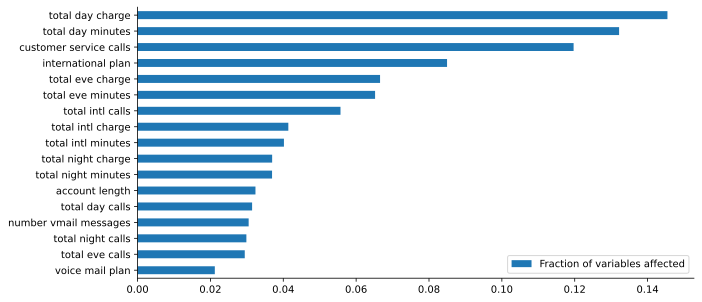

In [98]:
feat_scores = pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores = feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

# LogisticsRegression

In [99]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report

lr = LogisticRegression() 
lr.fit(X_train, y_train)

C:\Users\vande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [137]:
y_pred_lr = lr.predict(X_test)

In [138]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       574
           1       0.64      0.08      0.13        93

    accuracy                           0.87       667
   macro avg       0.75      0.53      0.53       667
weighted avg       0.84      0.87      0.82       667



In [140]:
cm_lr = confusion_matrix(y_test, y_pred_lr) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[570   4]
 [ 86   7]]


<AxesSubplot:>

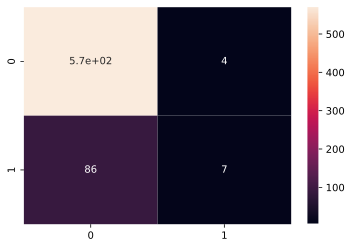

In [141]:
sns.heatmap(cm,annot=True)

# Support Vector Machine Classifier

In [142]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

In [143]:
svm = LinearSVC()
svm = CalibratedClassifierCV(svm)
svm.fit(X_train, y_train)

C:\Users\vande\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\vande\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\vande\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\vande\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\vande\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(base_estimator=LinearSVC())

In [144]:
y_pred_svm = svm.predict(X_test)

In [145]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       574
           1       0.43      0.03      0.06        93

    accuracy                           0.86       667
   macro avg       0.65      0.51      0.49       667
weighted avg       0.80      0.86      0.80       667



In [146]:
cm_svm = confusion_matrix(y_test, y_pred_svm) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[570   4]
 [ 86   7]]


<AxesSubplot:>

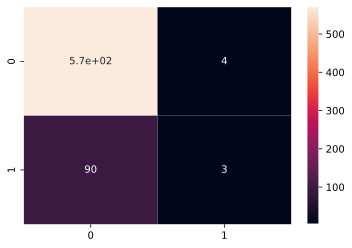

In [147]:
sns.heatmap(cm_svm,annot=True)

# Random Forest Classifier 2

In [121]:
from sklearn.ensemble import RandomForestClassifier 

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [148]:
y_pred_rf = model_rf.predict(X_test)

In [149]:
from sklearn import metrics   
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_rf)) 

ACCURACY OF THE MODEL:  0.9460269865067467


In [150]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       574
           1       0.94      0.66      0.77        93

    accuracy                           0.95       667
   macro avg       0.94      0.82      0.87       667
weighted avg       0.95      0.95      0.94       667



In [151]:
cm_rf = confusion_matrix(y_test, y_pred_rf) 
print ("Confusion Matrix : \n", cm_rf)

Confusion Matrix : 
 [[570   4]
 [ 32  61]]


<AxesSubplot:>

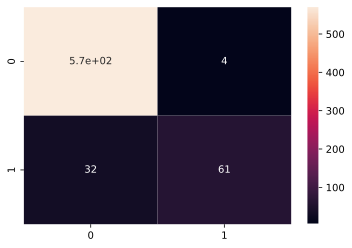

In [152]:
sns.heatmap(cm_rf,annot=True)

### Optimization Using GridSearch

In [ ]:
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X,y)

In [ ]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

# KNN

In [153]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [154]:
y_pred_knn = model_rf.predict(X_test)

In [155]:
from sklearn.metrics import confusion_matrix, classification_report
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_knn)) 

ACCURACY OF THE MODEL:  0.9460269865067467


In [156]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       574
           1       0.94      0.66      0.77        93

    accuracy                           0.95       667
   macro avg       0.94      0.82      0.87       667
weighted avg       0.95      0.95      0.94       667



# Naive Bayes Classifier

In [135]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [157]:
# making predictions on the testing set
y_pred_nb = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_nb)*100)

Gaussian Naive Bayes model accuracy(in %): 85.30734632683658


# ROC / AUC Comparison

In [161]:
from sklearn.metrics import roc_auc_score, roc_curve

In [162]:
fpr1, tpr1, thresh1 = roc_curve(y_test, lr.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1], pos_label = 1)

In [163]:
auc_score1 = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.7451013450226669
Support Vector Machine:  0.7560975609756098
Random Forest:  0.8786107676744971
K-Nearest Neighbors:  0.6505751002210483
Naive Bayes:  0.8100108650856094


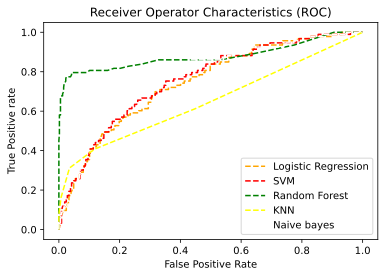

In [164]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()